 Iter          Cost_f           Error
    0   -9.062059e-04    3.060715e+00
  100   -8.492112e-04    2.959708e-03
  200   -8.492905e-04    1.096409e-08
  300   -8.492905e-04    1.593095e-12
  400   -8.492905e-04    1.527914e-12
  415   -1.032063e-03    9.884739e-13


0.09999999999999994


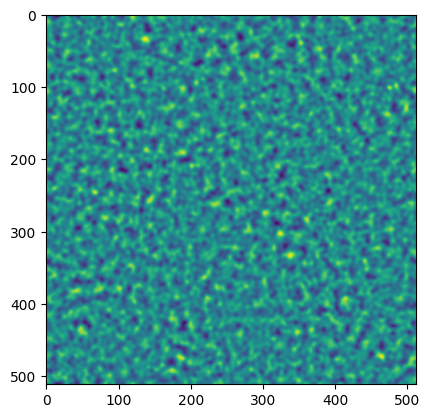

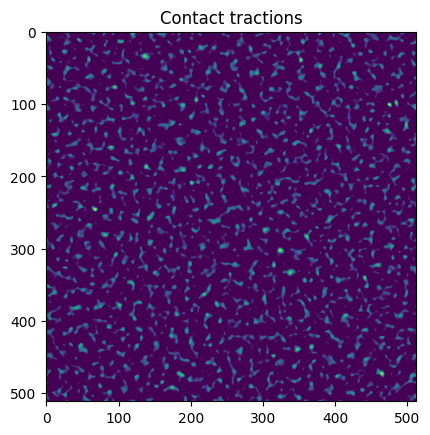

Please cite the following publications:

Frérot, L., Anciaux, G., Rey, V., Pham-Ba, S. & Molinari, J.-F. Tamaas: a library for elastic-plastic contact of periodic rough surfaces. Journal of Open Source Software 5, 2121 (2020).
	10.21105/joss.02121
Frérot, L., Anciaux, G., Rey, V., Pham-Ba, S., & Molinari, J.-F. Tamaas, a high-performance library for periodic rough surface contact. Zenodo (2019).
	10.5281/zenodo.3479236
Hu, Y. Z. & Tonder, K. Simulation of 3-D random rough surface by 2-D digital filter and fourier analysis. International Journal of Machine Tools and Manufacture 32, 83–90 (1992).
	10.1016/0890-6955(92)90064-N
Polonsky, I. A. & Keer, L. M. A numerical method for solving rough contact problems based on the multi-level multi-summation and conjugate gradient techniques. Wear 231, 206–219 (1999).
	10.1016/S0043-1648(99)00113-1
Rey, V., Anciaux, G. & Molinari, J.-F. Normal adhesive contact on rough surfaces: efficient algorithm for FFT-based BEM resolution. Comput Mech 1–13 (2

[Publication(citation='Frérot, L., Anciaux, G., Rey, V., Pham-Ba, S. & Molinari, J.-F. Tamaas: a library for elastic-plastic contact of periodic rough surfaces. Journal of Open Source Software 5, 2121 (2020).', doi='10.21105/joss.02121'),
 Publication(citation='Frérot, L., Anciaux, G., Rey, V., Pham-Ba, S., & Molinari, J.-F. Tamaas, a high-performance library for periodic rough surface contact. Zenodo (2019).', doi='10.5281/zenodo.3479236'),
 Publication(citation='Hu, Y. Z. & Tonder, K. Simulation of 3-D random rough surface by 2-D digital filter and fourier analysis. International Journal of Machine Tools and Manufacture 32, 83–90 (1992).', doi='10.1016/0890-6955(92)90064-N'),
 Publication(citation='Polonsky, I. A. & Keer, L. M. A numerical method for solving rough contact problems based on the multi-level multi-summation and conjugate gradient techniques. Wear 231, 206–219 (1999).', doi='10.1016/S0043-1648(99)00113-1'),
 Publication(citation='Rey, V., Anciaux, G. & Molinari, J.-F. No

In [1]:
#!/usr/bin/env python3
#
# Copyright (©) 2016-2024 EPFL (École Polytechnique Fédérale de Lausanne),
# Laboratory (LSMS - Laboratoire de Simulation en Mécanique des Solides)
# Copyright (©) 2020-2024 Lucas Frérot
#
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU Affero General Public License as published
# by the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
#
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU Affero General Public License for more details.
#
# You should have received a copy of the GNU Affero General Public License
# along with this program.  If not, see <https://www.gnu.org/licenses/>.

import tamaas as tm
import matplotlib.pyplot as plt

from tamaas.utils import publications

# Initialize threads and fftw
tm.set_log_level(tm.LogLevel.info)  # Show progression of solver

# Surface size
n = 512

# Surface generator
sg = tm.SurfaceGeneratorFilter2D([n, n])
sg.random_seed = 1

# Spectrum
sg.spectrum = tm.Isopowerlaw2D()

# Parameters
sg.spectrum.q0 = 16
sg.spectrum.q1 = 16
sg.spectrum.q2 = 64
sg.spectrum.hurst = 0.8

# Generating surface
surface = sg.buildSurface()
surface /= tm.Statistics2D.computeSpectralRMSSlope(surface)

plt.imshow(surface)

# Creating model
model = tm.ModelFactory.createModel(tm.model_type.basic_2d, [1., 1.], [n, n])

# Solver
solver = tm.PolonskyKeerRey(model, surface, 1e-12)

# Solve for target pressure
p_target = 0.1#avarge pressure
solver.solve(p_target)

plt.figure()
plt.imshow(model.traction)
plt.title('Contact tractions')
print(model.traction.mean())

plt.show()

publications()


In [3]:
tm.MaxwellViscoelastic

tamaas._tamaas.MaxwellViscoelastic